In [2]:
import os
import natsort
import numpy as np
import pandas as pd
import re
import string
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models

/home/yew/LDAproject/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
model_list = []
for file in natsort.os_sorted(os.listdir("../../Data/comb_global/")):
    if file.startswith("model_"):
        model = file
        open_model = open("../../Data/comb_global/"+model, 'rb')
        model = pickle.load(open_model)
        model_list.append(model)

In [4]:
cv_list = []
for file in natsort.os_sorted(os.listdir("../../Data/comb_global/")):
    if file.startswith("cv_"):
        cv = file
        open_cv = open("../../Data/comb_global/"+cv, 'rb')
        cv = pickle.load(open_cv)
        cv_list.append(cv)

In [ ]:
# plot graph for coherence values
limit=101;start=2;step=1
x = range(start,limit,step)
f = plt.figure()
plt.plot(x, cv_list)
plt.xlabel("Number of topics")
plt.ylabel("C_v score")
plt.show()
f.savefig("../../Data/comb_global/coherencePlot.png", dpi=500)
# 10, 17*, 22

In [7]:
for idx, topic in model_list[15].print_topics(-1, num_words=16):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.115*"record" + 0.050*"endemic" + 0.046*"occur" + 0.037*"know" + 0.036*"island" + 0.035*"find" + 0.033*"range" + 0.029*"species" + 0.029*"asl" + 0.026*"area" + 0.019*"province" + 0.018*"elevation" + 0.016*"specimen" + 0.016*"region" + 0.015*"report" + 0.014*"recent"
Topic: 1 
Words: 0.068*"threat" + 0.050*"habitat" + 0.029*"impact" + 0.026*"human" + 0.022*"water" + 0.022*"pollution" + 0.020*"activity" + 0.020*"development" + 0.019*"increase" + 0.019*"population" + 0.018*"major" + 0.015*"cause" + 0.014*"change" + 0.013*"potential" + 0.013*"use" + 0.013*"area"
Topic: 2 
Words: 0.052*"water" + 0.040*"find" + 0.032*"depth" + 0.026*"river" + 0.026*"occur" + 0.024*"stream" + 0.024*"small" + 0.022*"female" + 0.019*"male" + 0.019*"species" + 0.018*"length" + 0.018*"inhabit" + 0.017*"area" + 0.016*"large" + 0.016*"egg" + 0.016*"shallow"
Topic: 3 
Words: 0.058*"forest" + 0.044*"area" + 0.041*"habitat" + 0.035*"agriculture" + 0.035*"threat" + 0.034*"fire" + 0.024*"threaten" + 0.

In [5]:
df_topics = pd.DataFrame(model_list[15].print_topics(-1, num_words=16))

In [6]:
df_topics.columns = ['Topic', 'Top 16 Words']

In [7]:
test = df_topics.iloc[0,1]

In [8]:
test_split = str(test)

In [13]:
def clean_one(text):
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d*', '', text)
    text = ", ".join(text.split())
    return text

In [14]:
df_topics['Top 16 Words'] = df_topics['Top 16 Words'].map(lambda x: clean_one(x))

In [16]:
dict = {0:'Monitor island endemics', 
        1:'Water pollution threat', 
        2:'Aquatic ecology', 
        3:'Forest loss', 
        4:'Monitoring and rewilding', 
        5:'Range', 
        6:'Common threats', 
        7:'Forest ecosystem', 
        8:'Population structure', 
        9:'Fisheries threats', 
        10:'Threat distribution', 
        11:'Forest fragmentation', 
        12:'Habitat loss', 
        13:'Area based protection', 
        14:'Assessment criteria', 
        15:'Population dynamics', 
        16:'Conservation actions'}

In [17]:
df_topics['Topic'] = df_topics['Topic'].map(dict)

In [21]:
pd.set_option('display.max_colwidth', None)

In [ ]:
corpus = corpora.MmCorpus("../../Data/comb_global/bow_corpus.mm")

dic = corpora.Dictionary.load("../../Data/comb_global/dic.dict")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[15], corpus, dic, sort_topics=False)
pyLDAvis.show(vis)
pyLDAvis.save_html(vis, "../../Data/comb_global/vis_22.html")

In [ ]:
# save json
pyLDAvis.save_json(vis, "../../Data/comb_global/vis_17.json")

# plot topic correlation

def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)

In [5]:
kbl, annotation = model_list[15].diff(model_list[15], distance='kullback_leibler', num_words=30)
hel, annotation = model_list[15].diff(model_list[15], distance='hellinger', num_words=30)
jac, annotation = model_list[15].diff(model_list[15], distance='jaccard', num_words=30)
jsh, annotation = model_list[15].diff(model_list[15], distance='jensen_shannon', num_words=30)

# plot_difference_matplotlib(mdiff, annotation=annotation)

In [6]:
from scipy.cluster import hierarchy

linkage_matrix = linkage(mdiff)

In [7]:
kbl_matrix = hierarchy.ward(kbl)
hel_matrix = hierarchy.ward(hel)
jac_matrix = hierarchy.ward(jac)
jsh_matrix = hierarchy.ward(jsh)

/home/yew/LDAproject/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


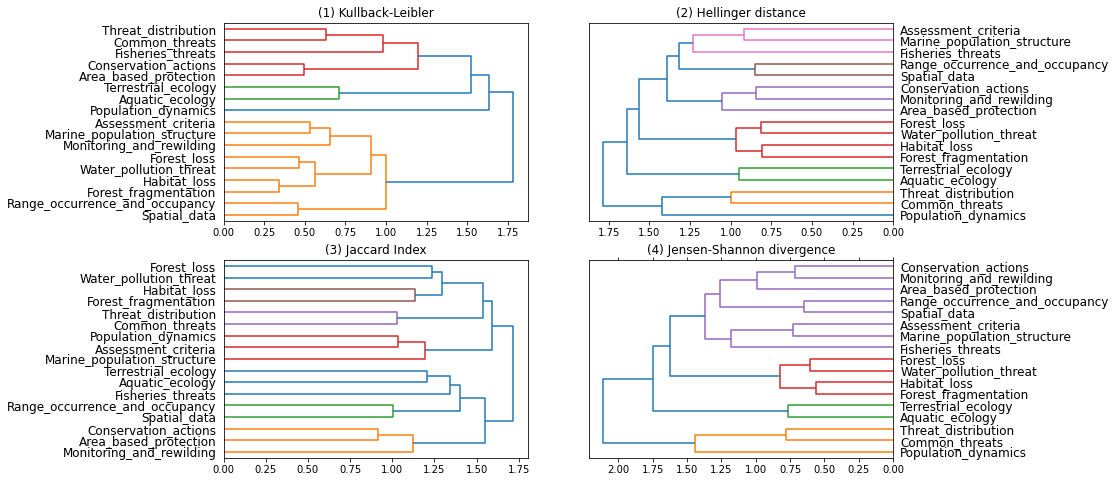

In [12]:
fig, ((ax0,ax1),(ax2,ax3))  = plt.subplots(2,2,
                        figsize=(12,8)
                        )
labs = ['Spatial_data', 
        'Water_pollution_threat', 
        'Aquatic_ecology', 
        'Forest_loss', 
        'Monitoring_and_rewilding', 
        'Range_occurrence_and_occupancy', 
        'Common_threats', 
        'Terrestrial_ecology', 
        'Marine_population_structure', 
        'Fisheries_threats', 
        'Threat_distribution', 
        'Forest_fragmentation', 
        'Habitat_loss', 
        'Area_based_protection', 
        'Assessment_criteria', 
        'Population_dynamics', 
        'Conservation_actions']

# labs = None
hierarchy.dendrogram(kbl_matrix, orientation='right', labels = labs, ax = ax0)
hierarchy.dendrogram(hel_matrix, orientation='left', labels = labs, ax = ax1)
hierarchy.dendrogram(jac_matrix, orientation='right', labels = labs, ax = ax2)
hierarchy.dendrogram(jsh_matrix, orientation='left', labels = labs, ax = ax3)

# set the title to subplots
ax0.set_title("(1) Kullback-Leibler")
ax1.set_title("(2) Hellinger distance")
ax2.set_title("(3) Jaccard Index")
ax3.set_title("(4) Jensen-Shannon divergence")

plt.tick_params(axis='x',
                which='both',
                bottom='off',
                top='off',
                labelbottom='off')

# plt.tight_layout()

# bottom left will be used in main text, whole figure in appendix as example of how dimension reduction results
# in multiple options to visualise the same set of data.

In [13]:
fig.savefig("../../Data/comb_global/four_dendrogram.svg")
plt.close('all')

group 1
forest loss -
wat pol thr -
habitat loss -
forest fragmentation -

group 2
threat distribution
common threats 

gp 3
population dynamics -
assessment criteria -
marine population structure -

gp 4
terrestrial ecology -
aquatic ecology -
fisheries threats -

gp 5
range o and o 
spatial data -

gp 6
con act -
area based prot -
monitor and rewild -

not including in main text:


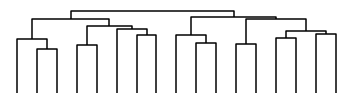

In [161]:
fig, ax  = plt.subplots(figsize=(5,1.5))
ax = hierarchy.dendrogram(jac_matrix, 
                          orientation='top',
                          color_threshold=0,
                          above_threshold_color='0',
                          labels=labs
                );

hierarchy.set_link_color_palette(None)

plt.box(False)

plt.tick_params(top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=False,
                labelbottom=False)

plt.tight_layout()

In [153]:
fig.savefig("../../Data/comb_global/dendrogram.svg")
plt.close('all')